In [1]:

# Import necessary modules from main.py
from main import Config, train, predict, forecast_future, Data
import matplotlib.pyplot as plt

# Define hyperparameters
# input_size = 168
# output_size = 6
hidden_size = 256
lstm_layers = 3
dropout_rate = 0.3
time_step = 168
batch_size = 32
learning_rate = 0.0001
random_seed = 42
patience = 30
epoch = 100

# Initialize Config
config = Config()
# config.input_size = input_size
# config.output_size = output_size
config.hidden_size = hidden_size
config.lstm_layers = lstm_layers
config.dropout_rate = dropout_rate
config.time_step = time_step
config.batch_size = batch_size
config.learning_rate = learning_rate
config.random_seed = random_seed
config.patience = patience
config.epoch = epoch
data_gainer = Data(config)


In [2]:

# Train the model
from main import load_logger


logger = load_logger(config)
train_X, valid_X, train_Y, valid_Y = data_gainer.get_train_and_valid_data()
train(config, logger, [train_X, train_Y, valid_X, valid_Y])


[ 2024/12/09 16:50:20 ] 
Config:
'add_train': False
'batch_size': 32
'continue_flag': ''
'cur_time': '2024_12_09_16_50_17'
'debug_mode': False
'debug_num': 500
'do_continue_train': False
'do_figure_save': False
'do_log_print_to_screen': True
'do_log_save_to_file': True
'do_predict': True
'do_train': True
'do_train_visualized': False
'dropout_rate': 0.3
'epoch': 100
'feature_columns': [1, 2, 3, 4, 5]
'figure_save_path': './figure/'
'hidden_size': 256
'input_size': 5
'label_columns': [3]
'label_in_feature_index': [2]
'learning_rate': 0.0001
'log_save_path': './log/2024_12_09_16_50_17_pytorch/'
'lstm_layers': 3
'model_name': 'improved_model_pytorch.pth'
'model_postfix': {'pytorch': '.pth'
'keras': '.h5'
'tensorflow': '.ckpt'}
'model_save_path': './checkpoint/pytorch/'
'output_size': 1
'patience': 30
'predict_day': 1
'random_seed': 42
'shuffle_train_data': True
'time_step': 720
'train_data_path': './data/hourly_prices.csv'
'train_data_rate': 0.9
'use_cuda': True
'used_frame': 'pytorch'
'va

/Users/nagagovindar@sphnet.com.sg/Documents/my_projects/stock_predict_with_LSTM/.venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[ 2024/12/09 16:56:07 ] Train loss: 0.051231, Valid loss: 0.002317
[ 2024/12/09 16:56:07 ] Model improved and saved at epoch 1!
[ 2024/12/09 16:56:07 ] Epoch 2/100


KeyboardInterrupt: 

/Users/nagagovindar@sphnet.com.sg/Documents/my_projects/stock_predict_with_LSTM/model/model_pytorch.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.

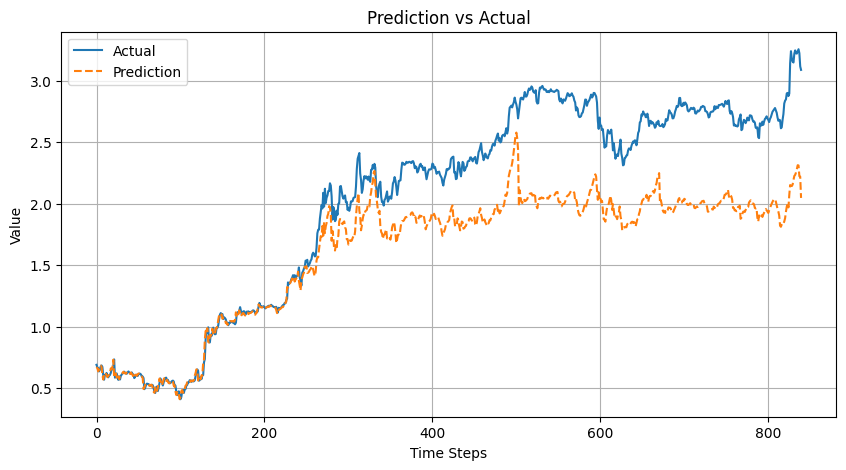

In [2]:

# Predict and Draw Function
def draw_predictions(config, test_X, true_Y, label='Prediction'):
    predictions = predict(config, test_X)
    plt.figure(figsize=(10, 5))
    plt.plot(true_Y, label='Actual')
    plt.plot(predictions, label=label, linestyle='--')
    plt.title(f'{label} vs Actual')
    plt.xlabel("Time Steps")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Get test data
test_X, test_Y = data_gainer.get_test_data(return_label_data=True)
draw_predictions(config, test_X, test_Y)


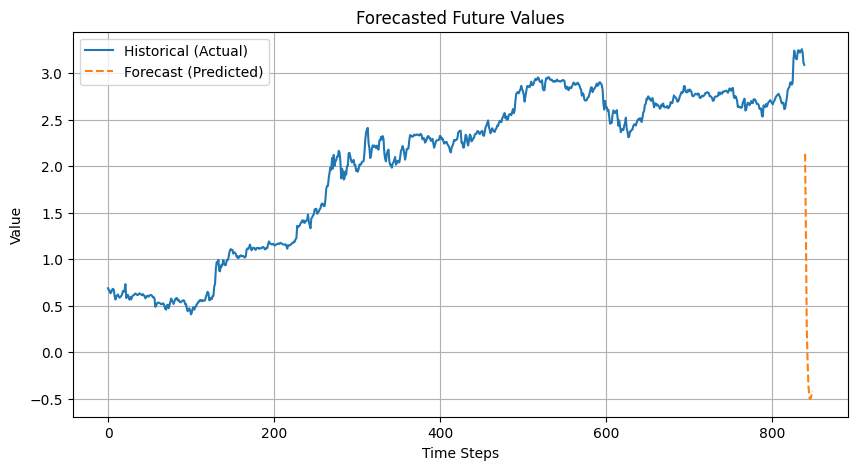

In [3]:

# Forecast Future and Draw Function
def draw_forecast(config, start_sequence, true_Y, n_future_steps=10):
    future_predictions = forecast_future(config, start_sequence, n_future_steps)
    future_len = len(future_predictions)
    history_len = len(true_Y)

    plt.figure(figsize=(10, 5))
    plt.plot(range(history_len), true_Y, label='Historical (Actual)')
    plt.plot(range(history_len, history_len + future_len), future_predictions, 
             label='Forecast (Predicted)', linestyle='--')
    plt.title("Forecasted Future Values")
    plt.xlabel("Time Steps")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Forecast and draw
future_steps = 10
start_sequence = test_X[-1:,:,:]  # Last sequence from test set
draw_forecast(config, start_sequence, test_Y[:, 0], n_future_steps=future_steps)
